In [31]:
import numpy as np
import numpy.ma as ma
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from scipy import signal

from PIL import Image

In [32]:
synthetic_dF = np.load('synthetic_dF.npy')

synthetic_dF0 = np.load('synthetic_dF0.npy')

synthetic_a_soma_signal_smooth = np.load('synthetic_a_soma_signal_smooth.npy', allow_pickle = True)
synthetic_a_dendrite_signal_smooth = np.load('synthetic_a_dendrite_signal_smooth.npy', allow_pickle = True)
synthetic_b_soma_signal_smooth = np.load('synthetic_b_soma_signal_smooth.npy', allow_pickle = True)

synthetic_somatic_event1 = np.load('synthetic_somatic_event1.npy', allow_pickle = True)
synthetic_dendritic_event = np.load('synthetic_dendritic_event.npy', allow_pickle = True)
synthetic_somatic_event2 = np.load('synthetic_somatic_event2.npy', allow_pickle = True)

synthetic_spikes_a_soma = np.load('synthetic_spikes_a_soma.npy', allow_pickle = True)
synthetic_spikes_a_dendrite = np.load('synthetic_spikes_a_dendrite.npy', allow_pickle = True)
synthetic_spikes_b_soma = np.load('synthetic_spikes_b_soma.npy', allow_pickle = True)

synthetic_raw_signal_a_soma = np.load('synthetic_raw_signal_a_soma.npy',allow_pickle = True)
synthetic_raw_signal_a_dendrite = np.load('synthetic_raw_signal_a_dendrite.npy',allow_pickle = True)
synthetic_raw_signal_b_soma = np.load('synthetic_raw_signal_b_soma.npy',allow_pickle = True)

synthetic_a_soma_roi = np.load('synthetic_a_soma_roi.npy',allow_pickle = True)
synthetic_a_dendrite_roi = np.load('synthetic_a_dendrite_roi.npy',allow_pickle = True)
synthetic_b_soma_roi = np.load('synthetic_b_soma_roi.npy',allow_pickle = True)

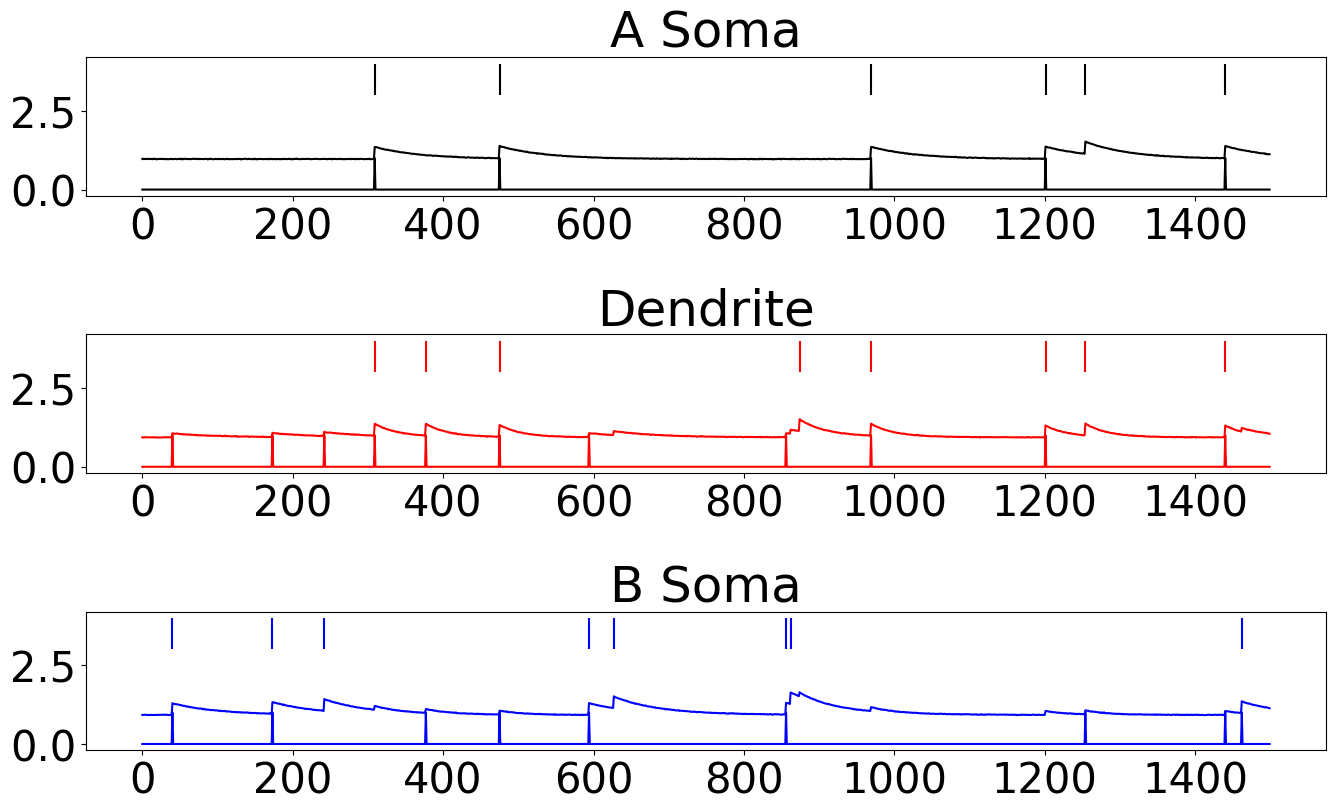

In [33]:
#%matplotlib
fig, axs = plt.subplots(3, 1,figsize=(16,9))
plt.subplots_adjust(hspace=1)

axs[0].vlines(np.flatnonzero(synthetic_spikes_a_soma), 3, 4, 'k')
axs[1].vlines(np.flatnonzero(synthetic_spikes_a_dendrite), 3, 4, 'r')
axs[2].vlines(np.flatnonzero(synthetic_spikes_b_soma), 3, 4, 'b')

axs[0].plot(synthetic_a_soma_signal_smooth, 'k')
axs[0].plot(synthetic_somatic_event1, 'k')
axs[1].plot(synthetic_a_dendrite_signal_smooth, 'r')
axs[1].plot(synthetic_dendritic_event, 'r')
axs[2].plot(synthetic_b_soma_signal_smooth, 'b')
axs[2].plot(synthetic_somatic_event2 , 'b')
axs[0].title.set_text('A Soma')
axs[1].title.set_text('Dendrite')
axs[2].title.set_text('B Soma')

In [34]:
# plt.plot(synthetic_a_dendrite_signal_smooth, '-r')

In [35]:
a_soma_source_prof = synthetic_dF[3:11,5:13,:]
a_dendrite_source_prof = synthetic_dF[9:20,6:12,:]
b_soma_source_prof = synthetic_dF[11:19,8:16,:]

synthetic_a_soma_base_profile = synthetic_a_soma_roi[3:11,5:13]
synthetic_a_dendrite_base_profile = synthetic_a_dendrite_roi[9:20,6:12]
synthetic_b_soma_base_profile = synthetic_b_soma_roi[11:19,8:16]

In [36]:
def size(signal):   
    signal_zero = 0                                                                                                                                                
    for x in signal:                                                                                                                                          
        if x == 0 and signal_zero > 0:                                                                                                                             
            yield signal_zero 
            signal_zero = 0
        if x == 1:
            signal_zero += 1
    if signal_zero > 0:
            yield signal_zero
            
def coordinates_and_min(signal):
    transient_coordinates = np.where(signal);
    output = []
    trans_L_minimum = min(np.asarray(list(size(signal))))
    trans_L_sizes = np.asarray(list(size(signal)))
    print(trans_L_minimum)
    print(trans_L_sizes)
    return transient_coordinates

def get_list(transient_coordinates):
    arr = coordinates_and_min(transient_coordinates)
    arr = np.array(arr)
    N_tran = np.size(arr)
    transient_data = arr.reshape(N_tran,)
    transient_data = list(transient_data)
    return transient_data

In [37]:
def transient_event_detector(signal, theta_upper = 1.04, theta_lower = 1): 
    
    N = len(signal)
    
    event = np.zeros(N)
    
    for i in np.arange(N):
        if (signal[i] > theta_upper):
            event[i] = 1 
        if (signal[i] < theta_lower):
            event[i] = 0
        else:
            event[i] = 1
            
    return event

In [38]:
# theta = 1.04
signal_og = synthetic_a_dendrite_signal_smooth
signal_over_theta = transient_event_detector(signal_og, 1.04, 1)

transient_data = get_list(signal_over_theta)

1
[ 31   4   1   1  42  54   1   1  64  59  54  99   1 102   2   2  60   1
   1 110  60]


In [39]:
MAX_SEQ = 5

def get_seq_len(transient_data, index):
    if index == len(transient_data)-1:
        return 1
    length = 0
    while (index + length + 1 < len(transient_data)) and (transient_data[index + length + 1] == transient_data[index + length]+1):
        length += 1
    return length+1

i = 0
output_transient_data = []
while i<len(transient_data):
    current_seq_len = get_seq_len(transient_data, i)
    current_seq_len = current_seq_len
    #print(current_seq_len, end=" ")
    if current_seq_len > MAX_SEQ:
        output_transient_data += transient_data[i:i+current_seq_len]
    i+=current_seq_len
# print(output_transient_data)

In [40]:
def consecutiveRanges(a, n):

    length = 1
    lista = []
     
    if (n == 0):
        return lista
     
    for i in range (1, n + 1):    
        if (i == n or a[i] - a[i - 1] != 1): 
            
            if (length == 1):
                lista.append(str(a[i - length]))    
            else:
                temp = (str(a[i - length]) +
                        " -> " + str(a[i - 1])) 
                lista.append(temp)
           
            length = 1
        
        else:
            length += 1
    return lista

In [41]:
def get_range(range_array_pre):
    ranges_array_pre = output_transient_data.copy()
    n = len(ranges_array_pre)
    ans = consecutiveRanges(range_array_pre, n)
     
    print ("[", end = "")
     
    for i in range (len(ans)):   
        if(i == len(ans)):
            print (ans[i], "]")
        else:
            ans[i] = ans[i]
            print (ans[i], end = ", ")

In [42]:
transient_ranges = get_range(output_transient_data)
transient_ranges

[40 -> 70, 173 -> 214, 242 -> 295, 309 -> 372, 377 -> 435, 475 -> 528, 594 -> 692, 856 -> 957, 969 -> 1028, 1201 -> 1310, 1440 -> 1499, 

In [43]:
def transient_profile(transient_signal, source_profile, base_pic, start = 1, finish = 1, step_size = 1, saved_pic_name = ''):
    index = np.arange(start-5, finish+5, step_size)
    index_len = np.arange(0,len(index),1)
    transient = transient_signal[index]
    source_profile = source_profile[:,:,index]
    W = transient * source_profile #weighted_frames
    transient_pic = np.sum(W[:,:,index_len],axis=2)
    normalized_trans_pic = transient_pic/sum(transient**2)
    cor = np.mean(ma.corrcoef(ma.masked_invalid(base_pic), ma.masked_invalid(normalized_trans_pic)))
    saved_pic = np.save(saved_pic_name, normalized_trans_pic)
    trans = normalized_trans_pic
    return base_pic, trans, cor

In [44]:
# transient_profile(synthetic_a_dendrite_signal_smooth, a_dendrite_source_prof, 35, 75, 1,'transients/false_transient_trial')

In [45]:
# plt.plot(synthetic_a_dendrite_signal_smooth[39:80],'r')

In [46]:
base_pic, trans, cor = transient_profile(synthetic_a_dendrite_signal_smooth, a_dendrite_source_prof, synthetic_a_dendrite_base_profile, 40, 70, 1, 'transients/true_transient_trial')

In [47]:
cor = np.round(cor, 3)

In [48]:
def time_profile(index_start = 0, index_stop = 0, name = '' ):
    
    interval_min = 5
    interval_max = index_stop-index_start+6
    
    fig, axs = plt.subplots(3, 1,figsize=(8,18), sharey = True)
    plt.subplots_adjust(hspace=0.5)
    mpl.rcParams["font.size"] = 30
    
    axs[0].vlines(x = interval_min, ymin = 0.8, ymax = 1.3, colors = 'orange', label = 'vline_multiple - full height')
    axs[0].vlines(x = interval_max, ymin = 0.8, ymax = 1.3, colors = 'orange', label = 'vline_multiple - full height')
    axs[1].vlines(x = interval_min, ymin = 0.8, ymax = 1.3, colors = 'orange', label = 'vline_multiple - full height')
    axs[1].vlines(x = interval_max, ymin = 0.8, ymax = 1.3, colors = 'orange', label = 'vline_multiple - full height')
    axs[2].vlines(x = interval_min, ymin = 0.8, ymax = 1.3, colors = 'orange', label = 'vline_multiple - full height')
    axs[2].vlines(x = interval_max, ymin = 0.8, ymax = 1.3, colors = 'orange', label = 'vline_multiple - full height')
    
    axs[0].plot(synthetic_a_dendrite_signal_smooth[index_start-5:index_stop+5], 'r')
    axs[1].plot(synthetic_a_soma_signal_smooth[index_start-5:index_stop+5], 'k')
    axs[2].plot(synthetic_b_soma_signal_smooth[index_start-5:index_stop+5], 'b')
    axs[0].title.set_text('A Dendrite')
    axs[1].title.set_text('A Soma')
    axs[2].title.set_text('B Soma')
    axs[0].title.set_size(40)
    axs[1].title.set_size(40)
    axs[2].title.set_size(40)

    plt.savefig(name)

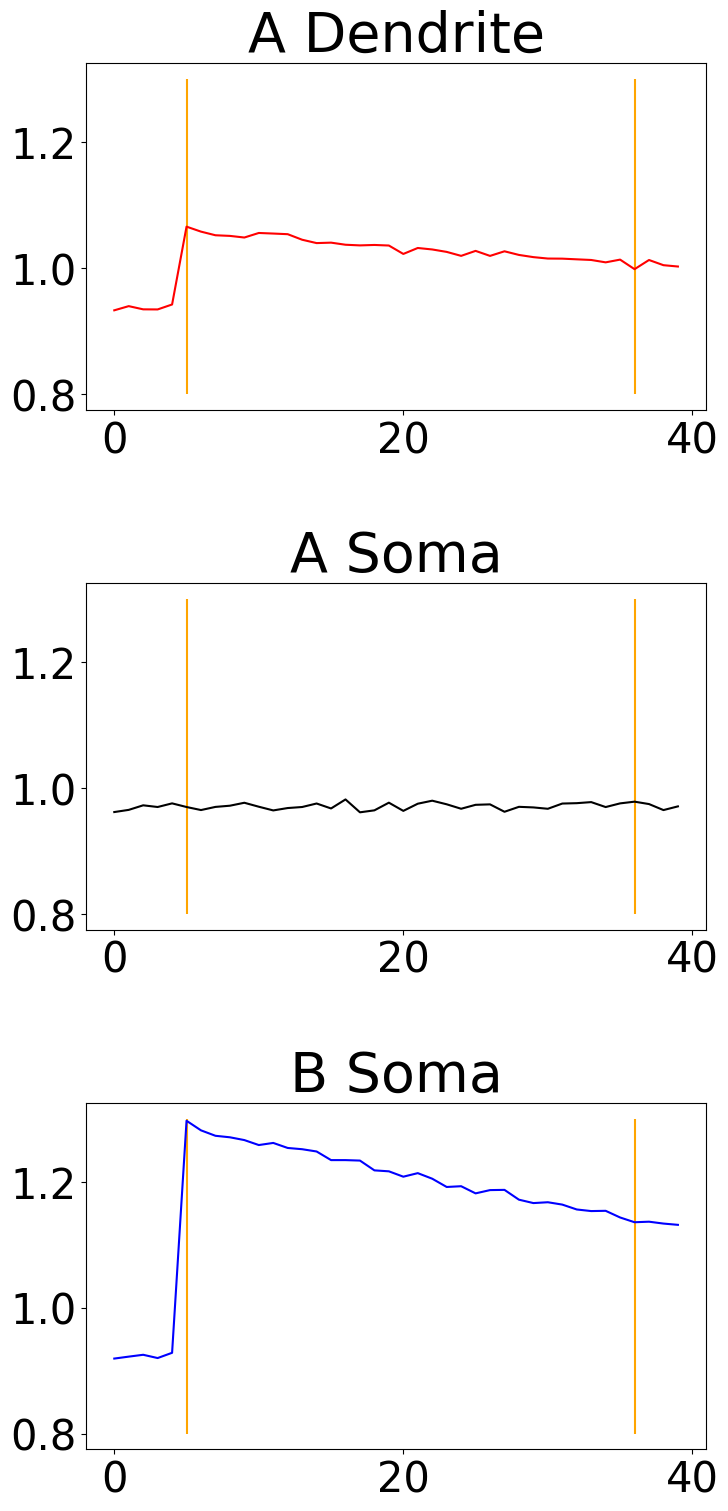

In [49]:
time_profile(40, 70,'transients/time_profiles/1st_time_profile.png')

In [50]:
img = Image.open("transients/time_profiles/1st_time_profile.png")

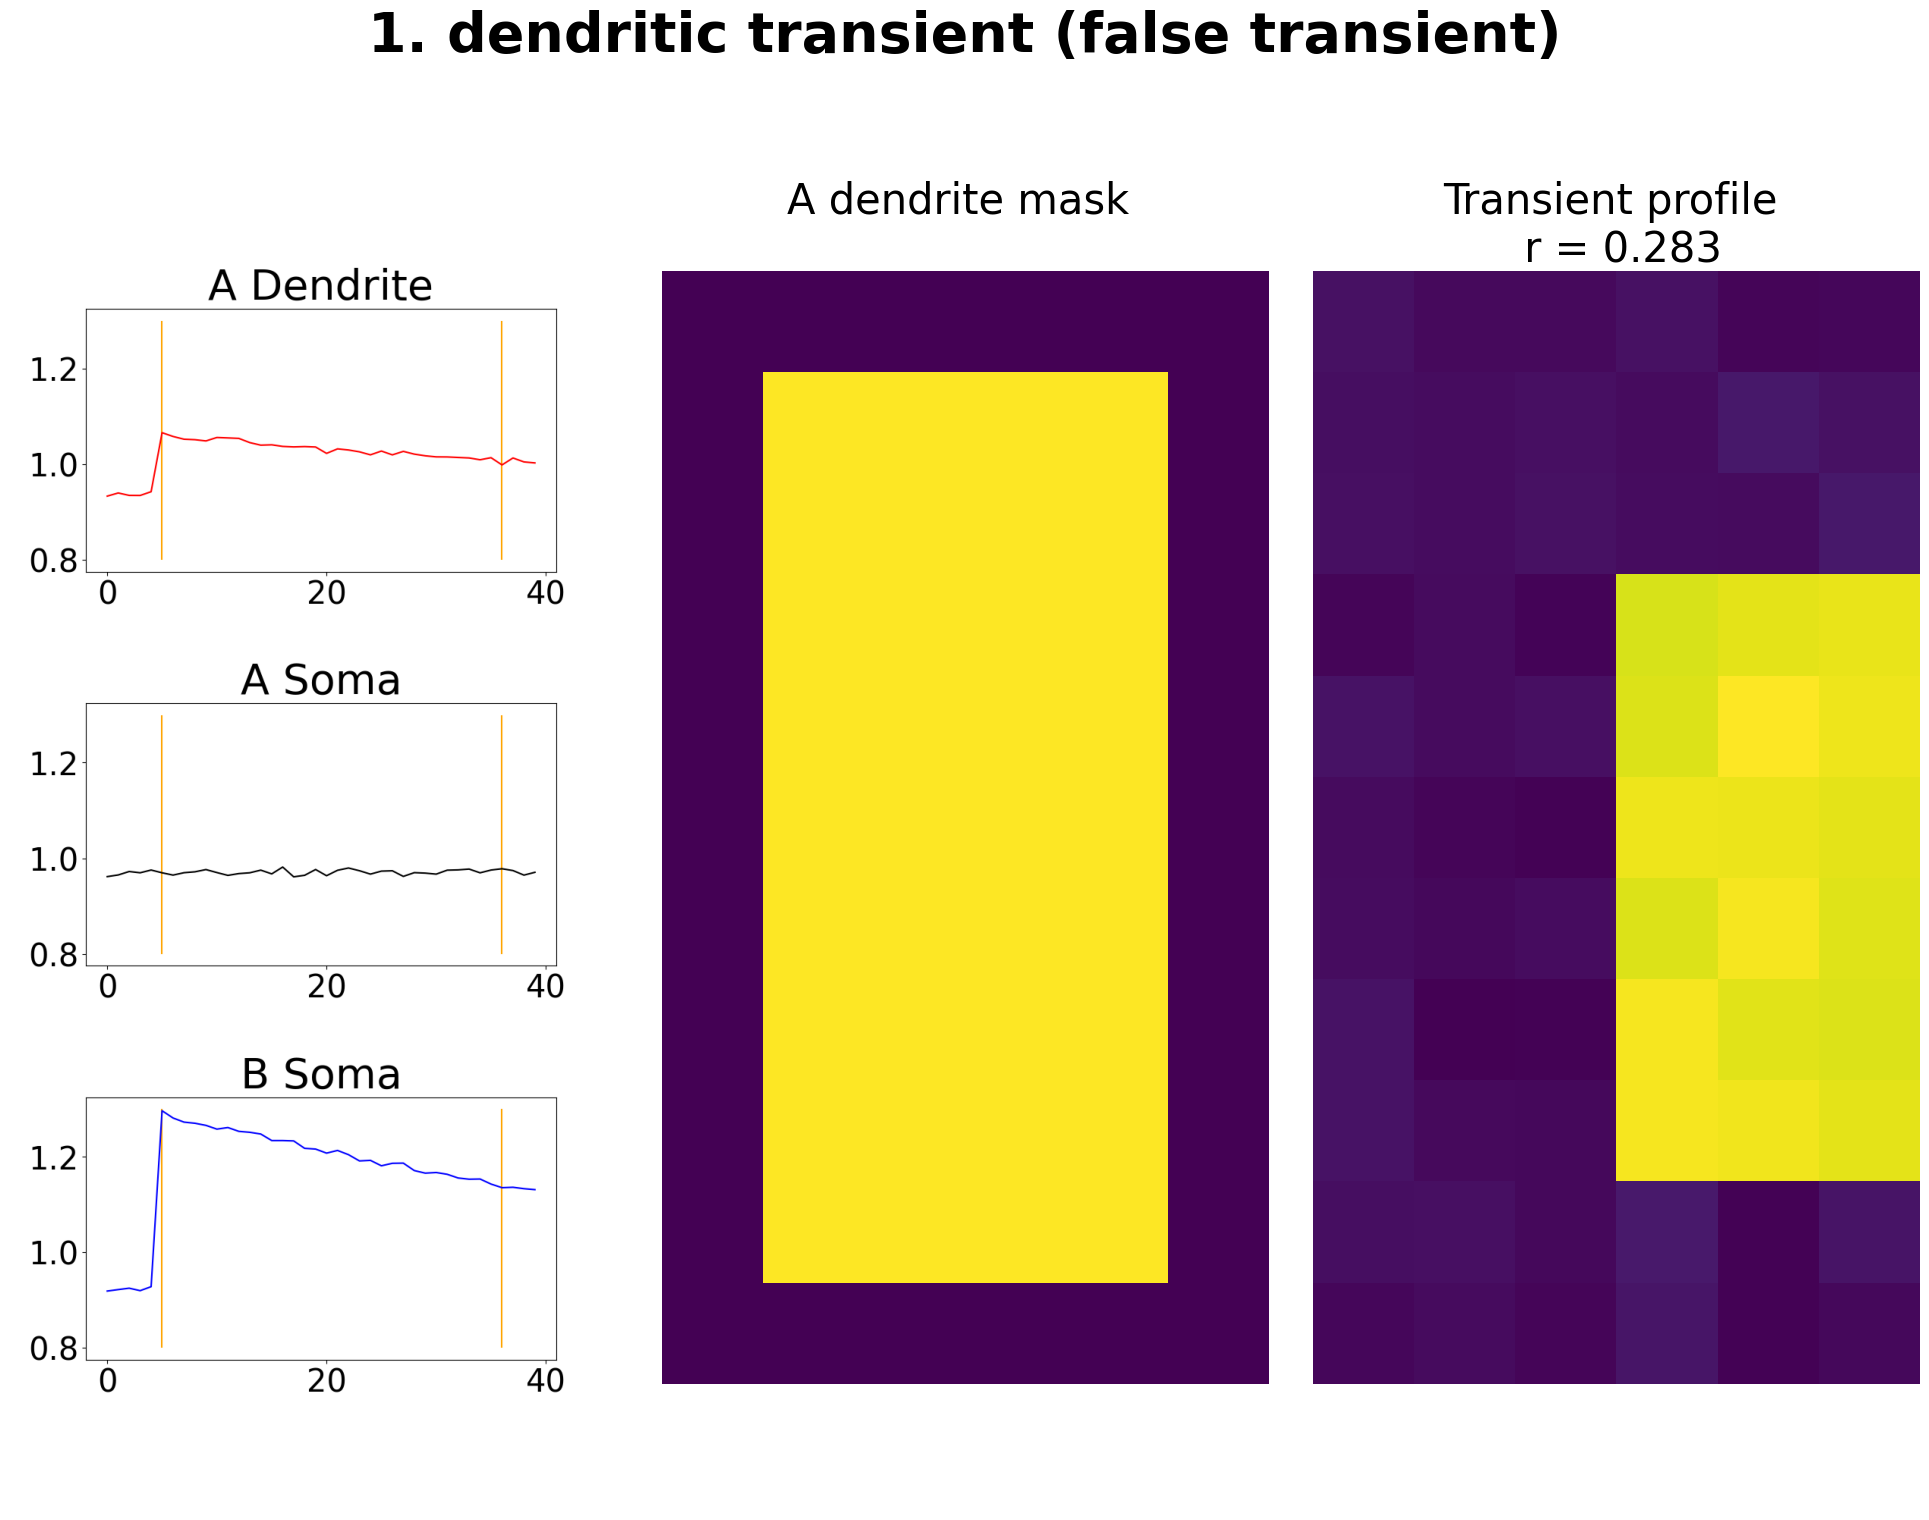

In [51]:
fig = plt.figure()
fig.set_figheight(16)
fig.set_figwidth(20)

rows = 1
columns = 3

#1
fig.add_subplot(rows, columns, 1)
plt.imshow(img)
plt.axis('off')


#2
fig.add_subplot(rows, columns, 2)
plt.imshow(base_pic)
plt.title('A dendrite mask \n', fontsize =30)
plt.axis('off')

#3
fig.add_subplot(rows, columns, 3)
plt.imshow(trans)
plt.title('Transient profile \n r = {0}'.format(cor), fontsize =30)
plt.axis('off')

fig.suptitle('1. dendritic transient (false transient)', fontsize=40, weight = 'bold')
fig.tight_layout()

plt.savefig('transients/final_transients/1st_transient_A_dendrite.png')